<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

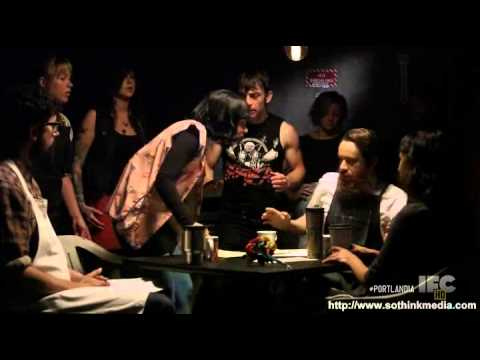

In [0]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [28]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 826.9MB 6.7MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.1.0-cp36-none-any.whl size=828255076 sha256=9bc7e9d4692a559db15ea9df120bff3ecb2d71e280a1aac46656fd79e7554f3d
  Stored in directory: /tmp/pip-ephem-wheel-cache-d77ba_6l/wheels/b4/d7/70/426d313a459f82ed5e06cc36a50e2bb2f0ec5cb31d8e0bdf09
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [0]:
%pwd

'/Users/jonathansokoll/Documents/lambda/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [54]:
import pandas as pd
import urllib.request

stop_words = [i[:-1].decode("utf-8") for i in urllib.request.urlopen("https://raw.githubusercontent.com/fozziethebeat/S-Space/master/data/english-stop-words-large.txt")]
print(stop_words[:5])

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

['a', "a's", 'able', 'about', 'above']


,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [56]:
import re

def make_tokens(text):
  split_text = re.sub(r"[^A-Za-z\ ]", "", text).lower().strip().split()
  split_text = [i for i in split_text if i not in stop_words]
  return split_text

shops["rating"] = ["bad" if int(i[1]) <= 3 else "good" for i in shops["star_rating"]]
shops["tokens"] = shops["full_review_text"].apply(make_tokens)
shops.head()

,coffee_shop_name,full_review_text,star_rating,rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,good,"[checkin, love, love, loved, atmosphere, corne..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,good,"[listed, date, night, austin, ambiance, austin..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,good,"[checkin, listed, brunch, spots, loved, eclect..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,bad,"[cool, decor, good, drinks, nice, seating, ove..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,good,"[checkin, located, northcross, mall, shopping,..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



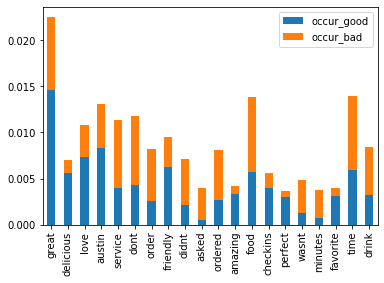

In [130]:
from collections import Counter

def counter_to_percent(counter):
    total = sum(counter.values())
    r = {}
    counter2 = {i: counter[i] for i in counter if counter[i] > 5}
    total = sum([counter2[i] for i in counter2])
    for key in counter2:
        r[key] = [counter2[key] / total]
    return r


def count_words():
  all_words = []
  for i in shops["tokens"]:
    all_words += [j for j in i]

  all_words_good = []
  for i in shops[shops.rating == "good"]["tokens"]:
    all_words_good += [j for j in i]

  all_words_bad = []
  for i in shops[shops.rating == "bad"]["tokens"]:
    all_words_bad += [j for j in i]

  df_bad  = pd.DataFrame().from_dict(counter_to_percent(Counter(all_words_bad)),  orient="index", columns=["occur_bad"])
  df_good  = pd.DataFrame().from_dict(counter_to_percent(Counter(all_words_good)),  orient="index", columns=["occur_good"])
  df_all  = pd.DataFrame().from_dict(counter_to_percent(Counter(all_words)),  orient="index", columns=["occur_all"])

  df_all = pd.concat([df_bad, df_good, df_all], axis=1)
  df_all["diff"] = abs(df_all["occur_bad"] - df_all["occur_good"])
  df_all = df_all.fillna(0)
  return df_all

token_analysis = count_words()
token_analysis = token_analysis.sort_values(by=["diff"], ascending=False).head(20)

import matplotlib.pyplot as plt
token_analysis[["occur_good", "occur_bad"]].plot(kind="bar", stacked=True)


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

